# Individual household electric power consumption

### Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

Notes:

1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

### Attribute Information:

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing 
mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
#Loading the data
df = pd.read_csv('Household_power_consumption.txt', delimiter=';')

In [5]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


## Data Exploration

In [6]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [7]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


### Checking the Datatype and changing them

In [8]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [9]:
# Convert the 'Date' and 'Time' columns to a single 'date_time' column by combining 
#the two columns and converting to datetime format
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [10]:
#Converting the object columns to float datatype
df['Global_active_power']=pd.to_numeric(df['Global_active_power'],errors='coerce')
df['Global_reactive_power']=pd.to_numeric(df['Global_reactive_power'],errors='coerce')
df['Voltage']=pd.to_numeric(df['Voltage'],errors='coerce')
df['Global_intensity']=pd.to_numeric(df['Global_intensity'],errors='coerce')
df['Sub_metering_1']=pd.to_numeric(df['Sub_metering_1'],errors='coerce')
df['Sub_metering_2']=pd.to_numeric(df['Sub_metering_2'],errors='coerce')
df['Sub_metering_3']=pd.to_numeric(df['Sub_metering_3'],errors='coerce')

In [11]:
df.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
date_time                datetime64[ns]
dtype: object

### Checking for null values

In [12]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
date_time                    0
dtype: int64

We can see there are many null values . There are many techniques to deal with null values like filling the null data with  mean ,median ,mode.
But in this data set we will dothe forward fill or backfill .

Reason:-The records are having null values are in between and the power used is recorded at every minute for 3-4 years. ffill() will fill last valid observation in next found Null record

In [13]:
df.ffill(axis=0,inplace=True)

## Feature Engineering

### Creating a seperate table for power consumption

(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

In [14]:
power= (df['Global_active_power']*1000/60) 
sub_power= df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['power_consumption'] =power-sub_power
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time,power_consumption
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,52.266667
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,72.333333
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,70.566667
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,71.800000
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,43.100000


We have successfully created a power consumption table in the household

### Creating Separate columns for Year,Quarter,Month,Day

In [15]:
df['year']=df['date_time'].apply(lambda x : x.year)
df['quarter']=df['date_time'].apply(lambda x : x.quarter)
df['month']=df['date_time'].apply(lambda x : x.month)
df['day']=df['date_time'].apply(lambda x : x.day)

In [16]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time,power_consumption,year,quarter,month,day
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,52.266667,2006,4,12,16
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,72.333333,2006,4,12,16
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,70.566667,2006,4,12,16
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,71.800000,2006,4,12,16
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,43.100000,2006,4,12,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,15.766667,2010,4,11,26
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,15.733333,2010,4,11,26
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,15.633333,2010,4,11,26
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,15.566667,2010,4,11,26


###### As we have only 16 records for 2006 year, which may deceive our analysis. As we will analyse the data yearly and this 16 records will not help us understand the data flow for the year 2006. We will remove those 16 records of 2006 and move ahead for analysis of remaining four year data.Reason of unavailabilty of data for 2006 could be, data collection might have started for analysis if from 16th december 2006 or else the previous data might have lost due to some serious problem or due to unavailabilty of proper required data for analysis like missing of some features or so.

In [17]:
# filter out 2006 data, only keep data post 2006
df= df[df['year'] > 2006]

In [18]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time,power_consumption,year,quarter,month,day
21996,1/1/2007,00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00,43.000000,2007,1,1,1
21997,1/1/2007,00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00,42.533333,2007,1,1,1
21998,1/1/2007,00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00,42.500000,2007,1,1,1
21999,1/1/2007,00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00,42.500000,2007,1,1,1
22000,1/1/2007,00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00,42.566667,2007,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,15.766667,2010,4,11,26
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,15.733333,2010,4,11,26
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,15.633333,2010,4,11,26
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,15.566667,2010,4,11,26


###### We will create subdataset for original dataset

As we have data for each minute for each day, we will group the data day-wise, so we will get dataset for per day (where all each minute data is grouped for same date)

In [19]:
#Made a seperate column just for the date
df['date']=pd.to_datetime(df['Date'])

In [20]:
#lets groupwise the date by Date
df_data=df.groupby(df['date']).sum()
df_data.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,year,quarter,month,day
date,,,,,,,,,,,,
2007-01-01,2749.004,148.166,345785.73,11400.4,0.0,352.0,5880.0,39584.733333,2890080,1440,1440,1440
2007-01-02,1824.760,150.264,346164.68,7678.8,1170.0,386.0,13145.0,15711.666667,2890080,1440,1440,2880
2007-01-03,517.564,107.628,347502.82,2172.8,0.0,316.0,1980.0,6330.066667,2890080,1440,1440,4320
2007-01-04,2785.952,202.552,345635.26,11735.2,4629.0,5401.0,19509.0,16893.533333,2890080,1440,1440,5760
2007-01-05,1663.858,181.608,337937.33,7305.6,4005.0,995.0,8546.0,14184.966667,2890080,1440,1440,7200
2007-01-06,1045.374,143.420,338865.21,4514.4,0.0,483.0,7664.0,9275.900000,2890080,1440,1440,8640
2007-01-07,1026.664,172.448,345696.70,4436.2,969.0,736.0,4690.0,10716.066667,2890080,1440,1440,10080
2007-01-08,1064.496,145.160,338444.73,4637.6,1583.0,0.0,9812.0,6346.600000,2890080,1440,1440,11520
2007-01-09,1701.486,289.846,344672.27,7294.2,2497.0,569.0,9733.0,15559.100000,2890080,1440,1440,12960


In [21]:
#We get the Power Consumption , sub_meterings, global active and reactive power by date
df_pc=df_data[['power_consumption']]
df_sub_met=df_data[['Sub_metering_1','Sub_metering_2','Sub_metering_3']]
df_global=df_data[['Global_active_power','Global_reactive_power','Global_intensity']]
df_pc.head()

,power_consumption
date,
2007-01-01,39584.733333
2007-01-02,15711.666667
2007-01-03,6330.066667
2007-01-04,16893.533333
2007-01-05,14184.966667


In [22]:
df_sub_met.head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3
date,,,
2007-01-01,0.0,352.0,5880.0
2007-01-02,1170.0,386.0,13145.0
2007-01-03,0.0,316.0,1980.0
2007-01-04,4629.0,5401.0,19509.0
2007-01-05,4005.0,995.0,8546.0


In [23]:
df_global.head()

,Global_active_power,Global_reactive_power,Global_intensity
date,,,
2007-01-01,2749.004,148.166,11400.4
2007-01-02,1824.760,150.264,7678.8
2007-01-03,517.564,107.628,2172.8
2007-01-04,2785.952,202.552,11735.2
2007-01-05,1663.858,181.608,7305.6


In [24]:
#We get the stats for year wise power consumption
df_pc.groupby(df_pc.index.year).describe().T


date                             2007          2008          2009  \
power_consumption count    365.000000    366.000000    365.000000   
                  mean   14316.716530  13635.700638  12728.079726   
                  std     7141.760475   6200.780172   4731.511575   
                  min     3969.333333   2313.633333   3804.100000   
                  25%     9122.500000   9383.325000   9443.333333   
                  50%    12678.133333  13211.400000  12650.666667   
                  75%    17471.766667  17616.600000  15607.100000   
                  max    40280.600000  38598.966667  34344.000000   

date                             2010  
power_consumption count    330.000000  
                  mean   11980.816061  
                  std     3963.001990  
                  min     2064.000000  
                  25%     9201.950000  
                  50%    11767.733333  
                  75%    14607.150000  
                  max    22103.766667

###### Observation:
1. The minimum power consumption was in the year 2010
2. The maximum power consumption was in the year 2007

### Exploratory Data Analysis

 We will vizualize the Power consumption for Yearly, Quarterly,Monthly,Weekly with different plots

<AxesSubplot:title={'center':'Yearly - Total watt-hour for Power Consumption'}, xlabel='Year', ylabel='Readings in watt-hour'>

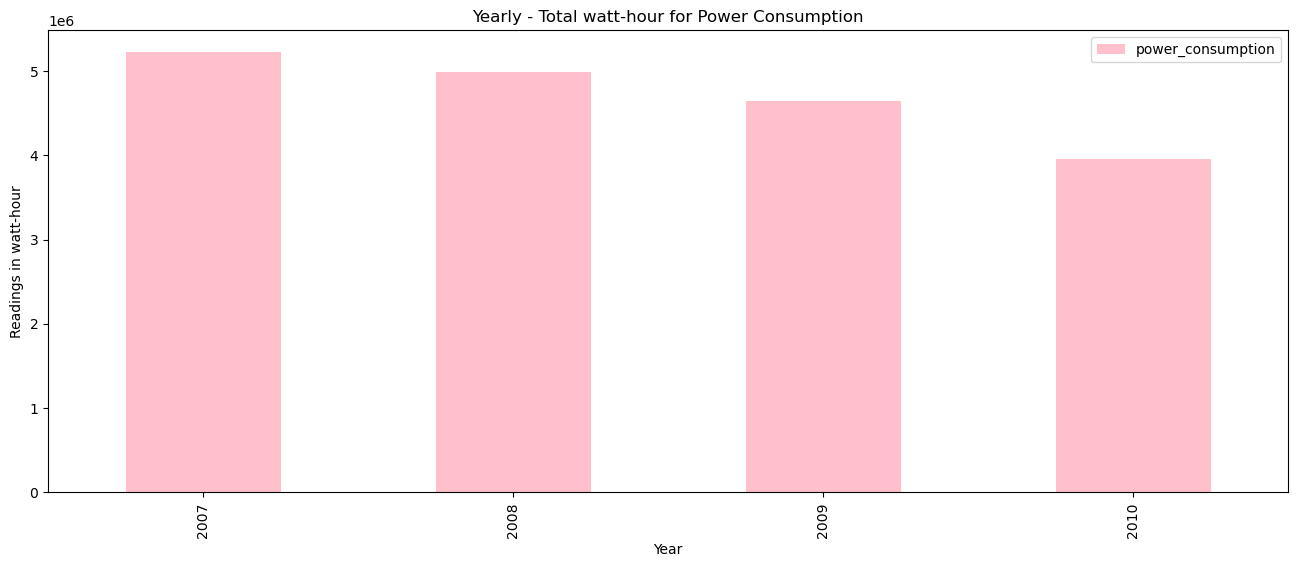

In [25]:
#Yearly Total Power Consumption
df_pc.groupby(df_pc.index.year).sum().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',
                                           title="Yearly - Total watt-hour for Power Consumption", figsize=(16,6),
                                           color= 'pink')


In [26]:
#Yearly minimum max and average power consumption
pc_min=df_pc.groupby(df_pc.index.year).min()
pc_max=df_pc.groupby(df_pc.index.year).max()
pc_av=df_pc.groupby(df_pc.index.year).mean()

#### Visualization of the Yearly minimum max and average power consumption

In [27]:
pc_av

,power_consumption
date,
2007,14316.716530
2008,13635.700638
2009,12728.079726
2010,11980.816061


array([<AxesSubplot:ylabel='power_consumption'>], dtype=object)

<Figure size 1000x500 with 0 Axes>

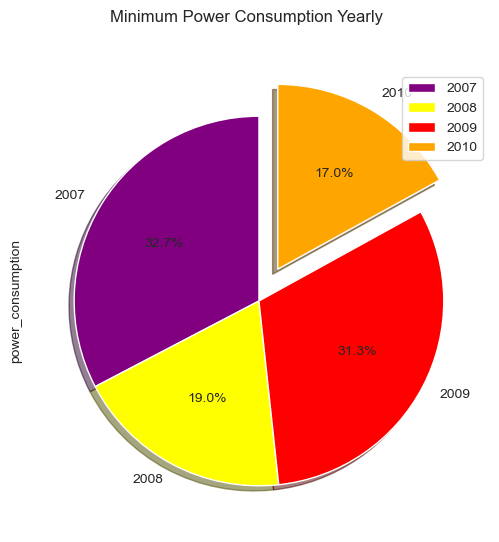

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))

#plt.subplot(3,1,1)
pc_min.plot(kind='pie',subplots='True',figsize=(10,6),autopct='%1.1f%%',title='Minimum Power Consumption Yearly',
            colors=['purple','yellow','red','orange'],startangle=90, explode=(0, 0, 0, 0.2), shadow=True)


array([<AxesSubplot:ylabel='power_consumption'>], dtype=object)

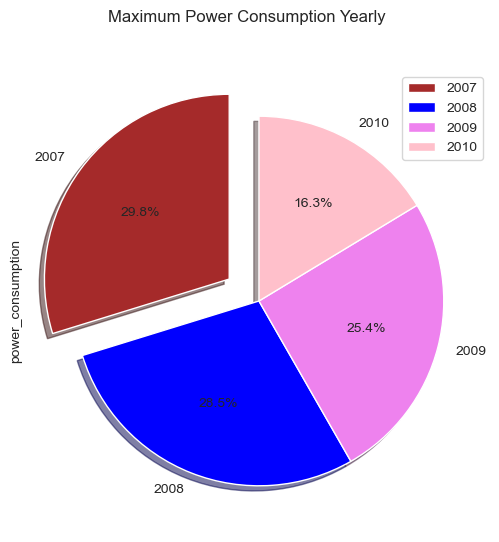

In [29]:
#Yearly maximum Power Consumption

pc_max.plot(kind='pie',subplots='True',figsize=(10,6),autopct='%1.1f%%',title='Maximum Power Consumption Yearly',
           colors=['brown','blue','violet','pink'],startangle=90,explode=(0.2, 0, 0, 0), shadow=True)

<AxesSubplot:title={'center':'Yearly Average Power Consumption in Watt'}, xlabel='Year', ylabel='Readings in watt-hour'>

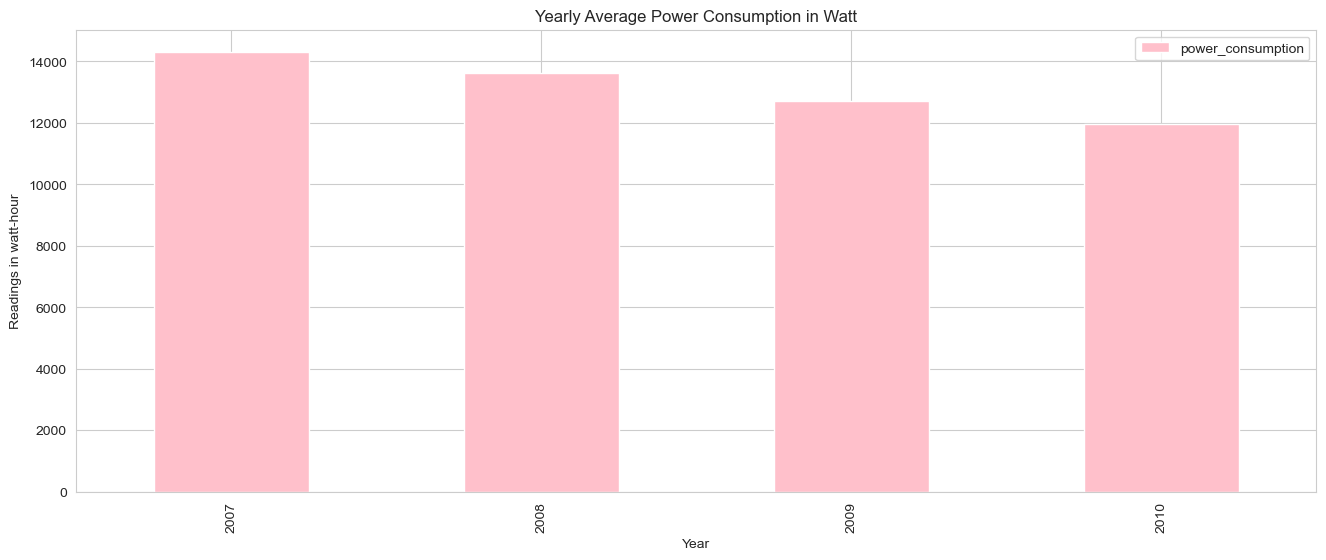

In [30]:
#Yearly Average Power Comsumption

pc_av.plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',
                                           title="Yearly Average Power Consumption in Watt", figsize=(16,6),
                                           color= 'pink')


#### Observation for Yearly Power Consumption (in watt hour)
(Ignoring 2006 year)

1.Total power consumption range is 4000000 - ~5500000 watt hour. i.e., 4000 - ~5500 kWH

2.Maximum Power consumption was done in year 2007

3.Minimum power cosumption was done in year 2010

4.Avearge power consumption is almost same across all years, range is ~12000 WH to ~ 14000 WH italicized text


### Monthly Power consumption 



In [31]:
#We get the stats for month wise power consumption

df_pc.groupby(df_pc.index.month).describe().T

date                               1             2             3   \
power_consumption count    123.000000    112.000000    123.000000   
                  mean   17324.245799  14029.823214  14045.931165   
                  std     6660.238298   6164.217835   5101.361067   
                  min     4440.066667   3986.066667   3922.300000   
                  25%    13529.400000  10300.900000  11546.350000   
                  50%    16893.533333  13659.716667  13521.866667   
                  75%    20203.166667  16226.175000  15792.850000   
                  max    39584.733333  38436.500000  40009.033333   

date                               4             5             6   \
power_consumption count    119.000000    123.000000    119.000000   
                  mean   12537.256303  12053.268293  10632.649300   
                  std     4693.786342   4155.691211   4707.685141   
                  min     4003.533333   3982.200000   2707.200000   
                  25%     9720.566667   9758.400000   7639.200000   
                  50%    11785.466667  11255.200000   9313.233333   
                  75%    14551.750000  13611.816667  12489.533333   
                  max    37472.333333  35758.733333  33301.133333   

date                               7             8             9   \
power_consumption count    123.000000    123.000000    119.000000   
                  mean    9866.530081   9936.857995  11780.145378   
                  std     4452.408816   5450.044634   3793.949791   
                  min     2698.400000   2313.633333   2064.000000   
                  25%     6530.433333   6320.950000   9694.116667   
                  50%     8943.100000   9231.333333  11141.200000   
                  75%    12246.733333  13248.766667  14226.983333   
                  max    23881.333333  22783.600000  22577.733333   

date                               10            11            12  
power_consumption count    123.000000    115.000000    104.000000  
                  mean   14118.885637  16343.848406  16271.385577  
                  std     4498.328151   6246.039765   6102.322420  
                  min     3498.200000   3829.600000   2510.400000  
                  25%    11151.733333  13217.133333  11614.683333  
                  50%    13965.833333  16402.566667  16259.000000  
                  75%    17036.933333  18578.383333  19024.850000  
                  max    25758.666667  40280.600000  37083.066667

#### Visualization of the Monthly Power Consumption

<AxesSubplot:title={'center':'Monthly - Total watt-hour for Power Consumption'}, xlabel='Month', ylabel='Readings in watt-hour'>

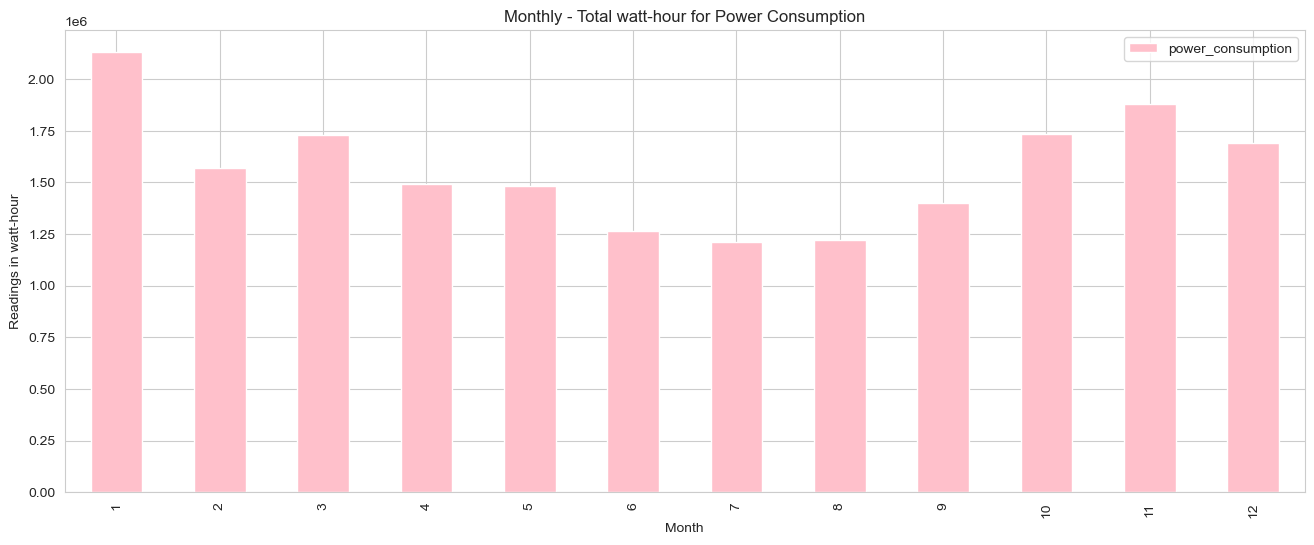

In [32]:
# Monthly - Total watt-hour for Power Consumption
df_pc.groupby(df_pc.index.month).sum().plot(kind="bar",xlabel='Month',
                                            ylabel='Readings in watt-hour',title="Monthly - Total watt-hour for Power Consumption",
                                            figsize=(16,6),color='pink')

array([<AxesSubplot:ylabel='power_consumption'>], dtype=object)

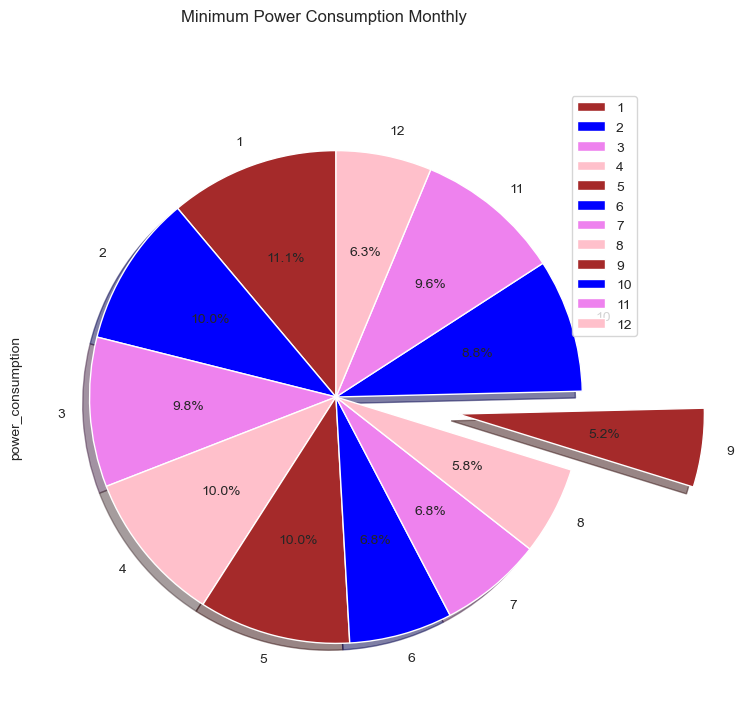

In [33]:
#Minimum Monthly Power Consumption in watt-hour
pc_min1=df_pc.groupby(df_pc.index.month).min()

pc_min1.plot(kind='pie',subplots='True',figsize=(10,8),autopct='%1.1f%%',title='Minimum Power Consumption Monthly',
           colors=['brown','blue','violet','pink'],startangle=90,explode=(0, 0, 0, 0,0,0,0,0,0.5,0,0,0), shadow=True)

array([<AxesSubplot:ylabel='power_consumption'>], dtype=object)

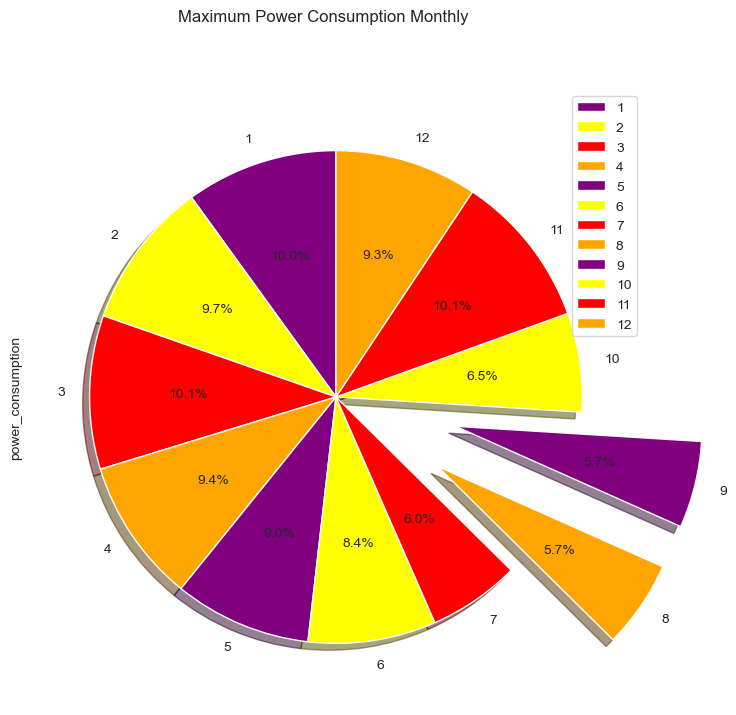

In [34]:
#Maximum Monthly Power Consumption in watt-hour
pc_max1=df_pc.groupby(df_pc.index.month).max()

pc_max1.plot(kind='pie',subplots='True',figsize=(10,8),autopct='%1.1f%%',title='Maximum Power Consumption Monthly',
            colors=['purple','yellow','red','orange'],startangle=90, explode=(0, 0, 0, 0,0,0,0,0.5,0.5,0,0,0), shadow=True)


<AxesSubplot:title={'center':'Monthly Average Power Consumption in Watt'}, xlabel='Month', ylabel='Readings in watt-hour'>

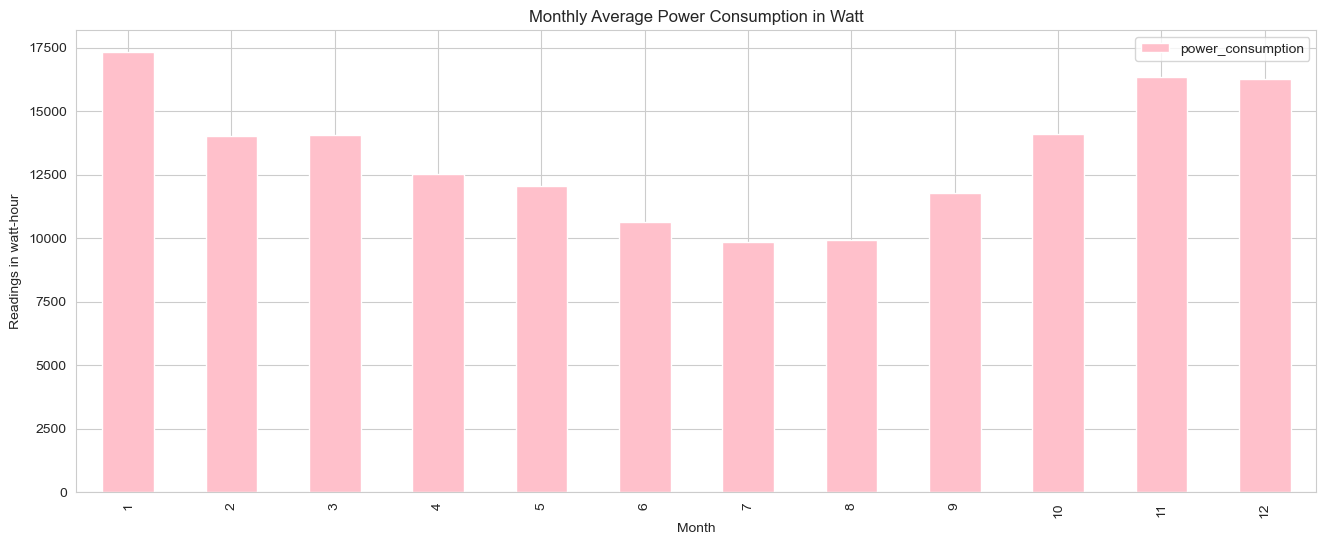

In [35]:
#Monthly Average Power Comsumption

pc_av1=df_pc.groupby(df_pc.index.month).mean()

pc_av1.plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',
                                           title="Monthly Average Power Consumption in Watt", figsize=(16,6),
                                           color= 'pink')


#### Observation for Monthly Power Consumption (in watt hour)
1.Total power consumption range is 8000000 - ~ 2300000 watt hour. i.e., 800 - ~2300 kWH

2.Minumum Power consumption is done in september month across all years around 2000 WH

3.Maximum power cosumption is done in December month across all years around ~ 61000 WH

4.Avearge power consumption for all 12 months, range is ~7064 WH to ~ 20000 WH

5.We can see clearly, that less power is consumed in June, July, August, September, whereas more power is consumed during December, January, February.

If we look at Monthly Average Graph, we can see the power consumption starts decreasing almost after March month till August - September post which the power consumption increases gradually.

### Quarterly Power consumption 

In [36]:
#We get the stats for quarter wise power consumption

df_pc.groupby(df_pc.index.quarter).describe().T


date                                1             2             3  \
power_consumption count    358.000000    361.000000    365.000000   
                  mean   15167.240130  11744.517359  10514.120639   
                  std     6189.410664   4581.186889   4695.125472   
                  min     3922.300000   2707.200000   2064.000000   
                  25%    11503.150000   8912.266667   7536.933333   
                  50%    14452.033333  10832.766667  10071.400000   
                  75%    17631.750000  13802.400000  13343.933333   
                  max    40009.033333  37472.333333  23881.333333   

date                                4  
power_consumption count    342.000000  
                  mean   15521.607018  
                  std     5713.063163  
                  min     2510.400000  
                  25%    11977.050000  
                  50%    15488.450000  
                  75%    18319.850000  
                  max    40280.600000

#### Visualization of the Quarterly Power Consumption

<AxesSubplot:title={'center':'Quarterly - Total watt-hour for Power Consumption'}, xlabel='Quarter', ylabel='Readings in watt-hour'>

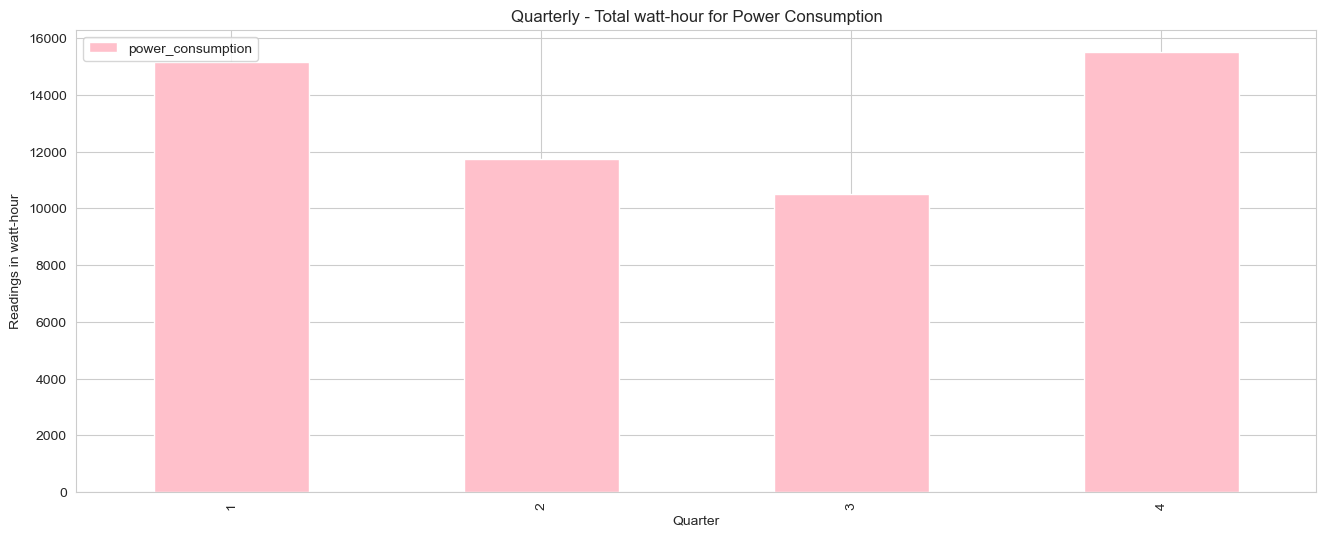

In [37]:
#Quarterly - Total watt-hour for Power Consumption
df_pc.groupby(df_pc.index.quarter).mean().plot(kind="bar",xlabel='Quarter',
                                            ylabel='Readings in watt-hour',title="Quarterly - Total watt-hour for Power Consumption",
                                            figsize=(16,6),color='pink')

array([<AxesSubplot:ylabel='power_consumption'>], dtype=object)

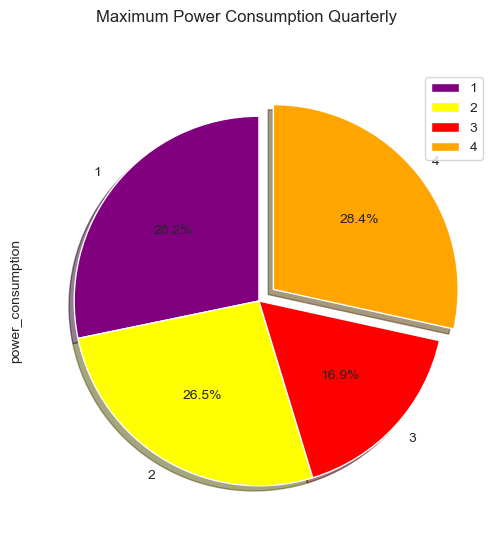

In [38]:
#Maximum Quarterly Power Consumption in watt-hour
pc_max2=df_pc.groupby(df_pc.index.quarter).max()

pc_max2.plot(kind='pie',subplots='True',figsize=(10,6),autopct='%1.1f%%',title='Maximum Power Consumption Quarterly',
            colors=['purple','yellow','red','orange'],startangle=90, explode=(0, 0, 0, 0.1), shadow=True)


array([<AxesSubplot:ylabel='power_consumption'>], dtype=object)

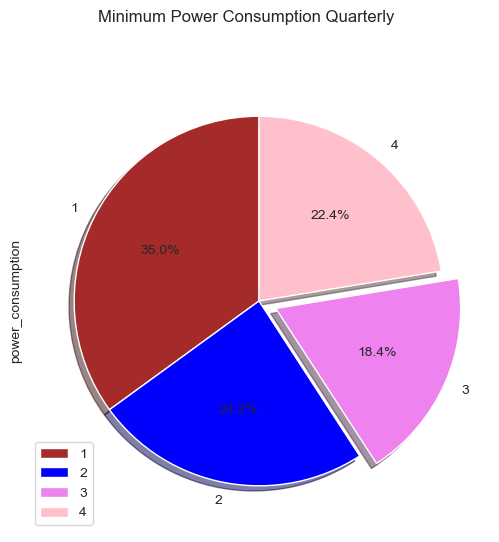

In [39]:
#Minimum Quarterly Power Consumption in watt-hour
pc_min2=df_pc.groupby(df_pc.index.quarter).min()

pc_min2.plot(kind='pie',subplots='True',figsize=(10,6),autopct='%1.1f%%',title='Minimum Power Consumption Quarterly',
            colors=['brown','blue','violet','pink'],startangle=90, explode=(0, 0, 0.1, 0), shadow=True)

<AxesSubplot:title={'center':'Quarterly - Average watt-hour for Power Consumption'}, xlabel='Quarter', ylabel='Readings in watt-hour'>

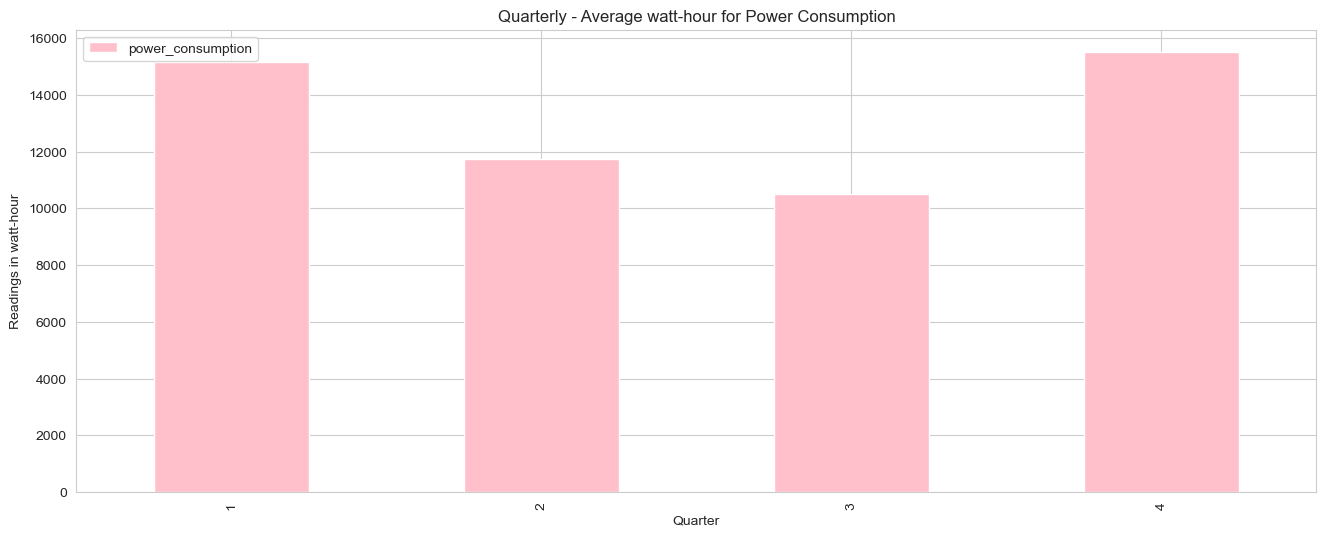

In [40]:
#Quarterly - Average watt-hour for Power Consumption
df_pc.groupby(df_pc.index.quarter).mean().plot(kind="bar",xlabel='Quarter',
                                            ylabel='Readings in watt-hour',title="Quarterly - Average watt-hour for Power Consumption",
                                            figsize=(16,6),color='pink')

#### Observation for Quarterly Power Consumption (in watt hour)

1.Minumum Power consumption is done in Third Quarter across all years around 2100 WH

2.Maximum power cosumption is done in Fourth Quarter across all years around ~ 6100 WH

3.Avearge power consumption for Second and third Quarter is comparatively less than First and fourth Quarter, which proves our above observation.

### Weekly Power consumption 

In [41]:
#We get the stats for quarter wise power consumption

df_pc.groupby(df_pc.index.week).describe().T


date                               1             2             3   \
power_consumption count     28.000000     27.000000     28.000000   
                  mean   14331.055952  13950.772840  20181.208333   
                  std     7173.728866   7732.772247   5015.455682   
                  min     4440.066667   4690.766667  13385.800000   
                  25%     9387.200000   9058.766667  17174.608333   
                  50%    13716.166667  11770.466667  18765.200000   
                  75%    17206.316667  16299.883333  21913.408333   
                  max    39584.733333  31876.833333  34344.000000   

date                               4             5             6   \
power_consumption count     28.000000     28.000000     27.000000   
                  mean   19449.571429  16510.622619  11170.541975   
                  std     5154.058986   5225.975710   3345.754898   
                  min    12035.600000   6285.800000   3986.066667   
                  25%    16345.741667  13768.433333   9886.750000   
                  50%    18175.683333  16237.500000  11667.833333   
                  75%    21582.908333  19933.650000  13448.266667   
                  max    32109.566667  25837.400000  16070.033333   

date                               7             8             9   \
power_consumption count     28.000000     28.000000     28.000000   
                  mean   17480.627381  15346.205952  12683.205952   
                  std     5785.819807   7356.534789   7418.566772   
                  min     8499.133333   6373.333333   6144.000000   
                  25%    14767.850000  10247.700000   7273.375000   
                  50%    15674.616667  15132.816667  11160.650000   
                  75%    18310.016667  17688.191667  15275.558333   
                  max    36590.366667  38436.500000  40009.033333   

date                               10  ...            44            45  \
power_consumption count     27.000000  ...     28.000000     27.000000   
                  mean   10567.056790  ...  14833.400000  12309.764198   
                  std     3703.778068  ...   8383.478165   5407.005964   
                  min     3922.300000  ...   6072.466667   3829.600000   
                  25%     7497.366667  ...  10044.500000   7754.233333   
                  50%    11489.600000  ...  12462.583333  12296.166667   
                  75%    13604.983333  ...  17406.916667  18019.883333   
                  max    16364.866667  ...  40280.600000  21663.066667   

date                               46            47            48  \
power_consumption count     28.000000     26.000000     26.000000   
                  mean   16771.517857  17315.543590  17548.262821   
                  std     4283.127303   4150.185003   6352.378830   
                  min     7911.766667  12495.900000  10318.300000   
                  25%    14374.466667  14848.408333  13954.550000   
                  50%    16123.216667  16780.083333  16232.433333   
                  75%    18690.583333  18520.150000  19159.633333   
                  max    27141.133333  34035.666667  38598.966667   

date                               49            50            51  \
power_consumption count     27.000000     21.000000     21.000000   
                  mean   12985.434568  15704.139683  17875.606349   
                  std     5011.339023   6393.655850   3684.125225   
                  min     4332.300000   2510.400000   9724.433333   
                  25%     9796.800000  12205.700000  16273.000000   
                  50%    13051.266667  16692.900000  17761.533333   
                  75%    15320.516667  18708.233333  19400.933333   
                  max    28525.800000  27416.966667  25693.900000   

date                               52            53  
power_consumption count     21.000000      7.000000  
                  mean   20486.879365  16040.490476  
                  std     7395.342045   3644.585463  
       

<AxesSubplot:title={'center':'Weekly - Total watt-hour for Power Consumption'}, xlabel='Week', ylabel='Readings in watt-hour'>

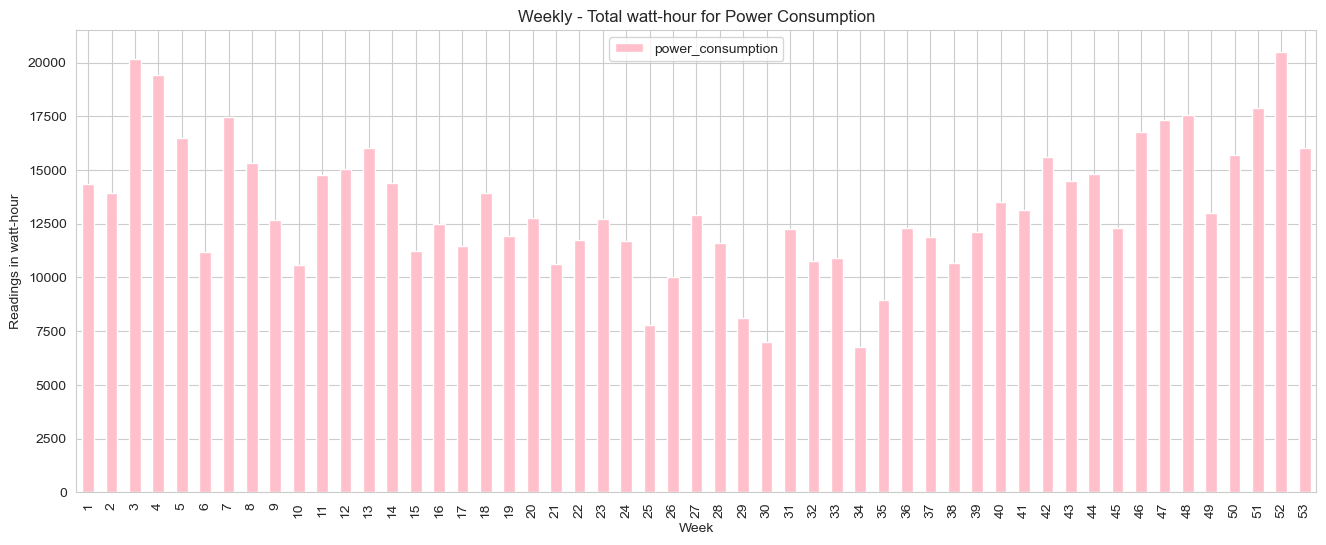

In [42]:
#Weekly - Total watt-hour for Power Consumption
df_pc.groupby(df_pc.index.week).mean().plot(kind="bar",xlabel='Week',
                                            ylabel='Readings in watt-hour',title="Weekly - Total watt-hour for Power Consumption",
                                            figsize=(16,6),color='pink')

<AxesSubplot:title={'center':'Weekly - Minimum watt-hour for Power Consumption'}, xlabel='Week', ylabel='Readings in watt-hour'>

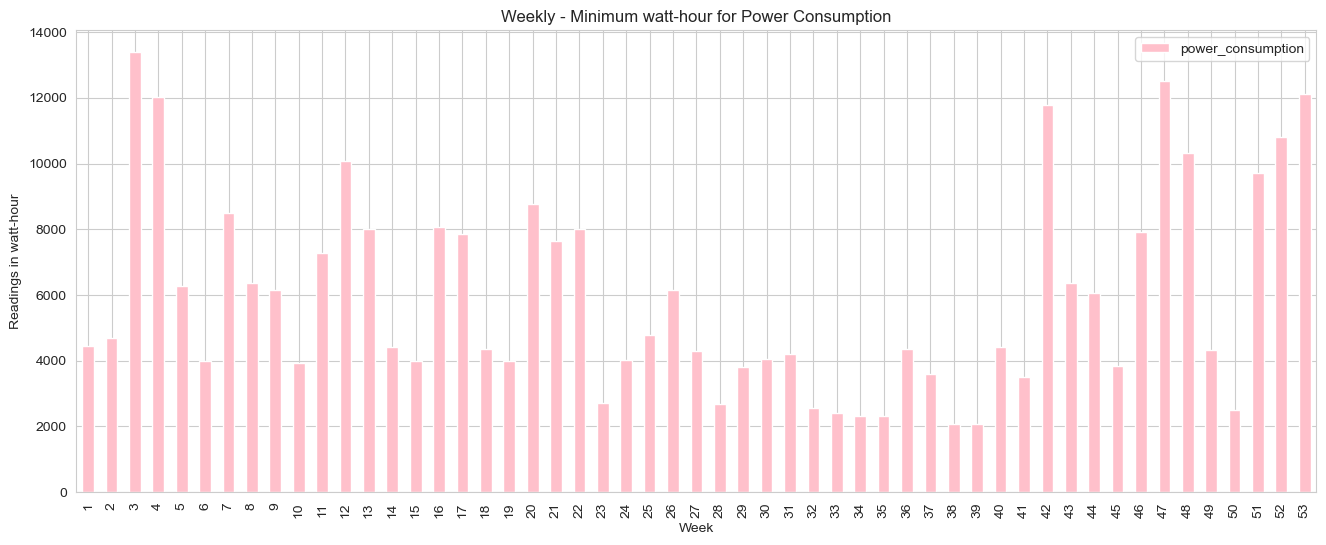

In [43]:
#Minimum Weekly Power Consumption in watt-hour
pc_min3=df_pc.groupby(df_pc.index.week).min()

pc_min3.plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',title="Weekly - Minimum watt-hour for Power Consumption",
                                            figsize=(16,6),color='pink')

<AxesSubplot:title={'center':'Weekly - Maximum watt-hour for Power Consumption'}, xlabel='Week', ylabel='Readings in watt-hour'>

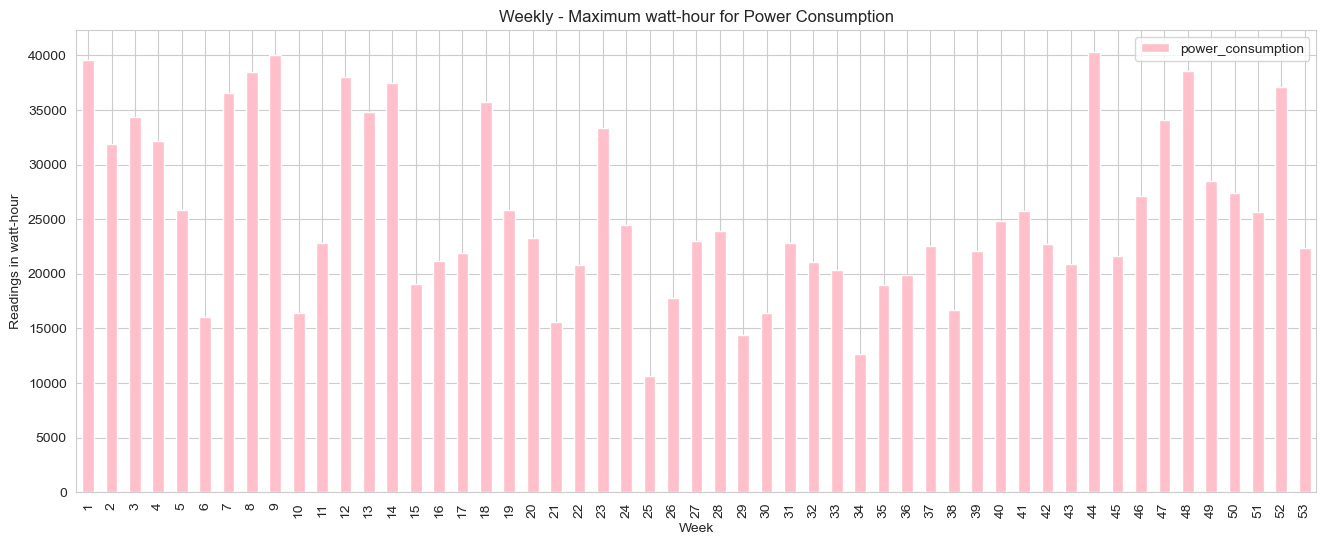

In [44]:
#Maximum Weekly Power Consumption in watt-hour
pc_max3=df_pc.groupby(df_pc.index.week).max()

pc_max3.plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',title="Weekly - Maximum watt-hour for Power Consumption",
                                            figsize=(16,6),color='pink')

<AxesSubplot:title={'center':'Weekly - Average watt-hour for Power Consumption'}, xlabel='Week', ylabel='Readings in watt-hour'>

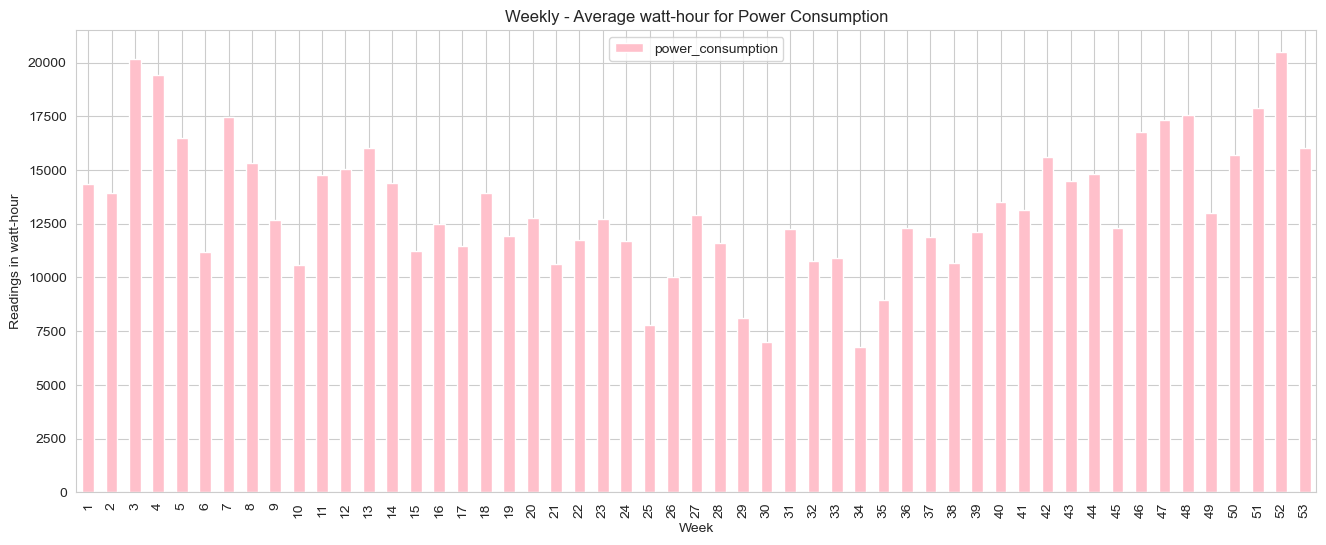

In [45]:
#Average Weekly Power Consumption in watt-hour
pc_max3=df_pc.groupby(df_pc.index.week).mean()

pc_max3.plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',title="Weekly - Average watt-hour for Power Consumption",
                                            figsize=(16,6),color='pink')

### Observation for Weekly Power Consumption (in watt hour)
1. Minumum Power consumption is done in between 28th to 35th week
2. Maximum power cosumption is done in almost first 12 weeks and in last 50th to 52th week
3. Average power consumption for is comparatively less in from 20th week to almost 38th week as compared to other weeks.

### Lets analyse week 44 which shows the week with highest Power Consumption

In [46]:
#Analysis of week 44 in all the 4 years

df_ana1=df_pc[df_pc.index.week==44]
print(df_ana1.groupby(df_ana1.index.year).mean())

      power_consumption
date                   
2007       18506.300000
2008       15009.628571
2009       13663.704762
2010       12153.966667


In [47]:
#Analysis of week 45 in all the 4 years

df_ana2=df_pc[df_pc.index.week==45]
print(df_ana2.groupby(df_ana2.index.year).mean())

      power_consumption
date                   
2007       10787.695238
2008       11809.852381
2009       12752.304762
2010       14152.444444


In [48]:
df_ana1.index

DatetimeIndex(['2007-10-29', '2007-10-30', '2007-10-31', '2007-11-01',
               '2007-11-02', '2007-11-03', '2007-11-04', '2008-10-27',
               '2008-10-28', '2008-10-29', '2008-10-30', '2008-10-31',
               '2008-11-01', '2008-11-02', '2009-10-26', '2009-10-27',
               '2009-10-28', '2009-10-29', '2009-10-30', '2009-10-31',
               '2009-11-01', '2010-11-01', '2010-11-02', '2010-11-03',
               '2010-11-04', '2010-11-05', '2010-11-06', '2010-11-07'],
              dtype='datetime64[ns]', name='date', freq=None)

In [49]:
# creating separate sub dataframes of week 44 for each year

w_2007 = df_data[(df_data.index >= '2007-10-29') & (df_data.index <= '2007-11-04')]
w_2008 = df_data[(df_data.index >= '2008-10-27') & (df_data.index <= '2008-11-02')]
w_2009 = df_data[(df_data.index >= '2009-10-26') & (df_data.index <= '2009-11-01')]
w_2010 = df_data[(df_data.index >= '2010-11-01') & (df_data.index <= '2010-11-07')]

In [50]:
# Check entire data of week 44 of year 2007

w_2007

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,year,quarter,month,day
date,,,,,,,,,,,,
2007-10-29,545.428,86.998,347318.36,2267.2,0.0,269.0,2749.0,6072.466667,2890080,5760,14400,41760
2007-10-30,811.008,89.840,346501.33,3386.0,0.0,1935.0,4256.0,7325.800000,2890080,5760,14400,43200
2007-10-31,1283.210,107.200,346088.13,5389.0,0.0,4700.0,8915.0,7771.833333,2890080,5760,14400,44640
2007-11-01,2255.194,230.020,347264.19,9588.0,1378.0,2170.0,12415.0,21623.566667,2890080,5760,15840,1440
2007-11-02,3571.228,204.314,344888.85,15158.6,2430.0,4765.0,13114.0,39211.466667,2890080,5760,15840,2880
2007-11-03,3480.636,173.374,345610.50,14575.0,4810.0,3420.0,9500.0,40280.600000,2890080,5760,15840,4320
2007-11-04,887.482,192.446,347262.95,3771.0,0.0,1112.0,6421.0,7258.366667,2890080,5760,15840,5760


In [51]:
# Check entire data of week 44 of year 2008
w_2008

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,year,quarter,month,day
date,,,,,,,,,,,,
2008-10-27,523.892,128.978,348808.40,2173.2,0.0,402.0,1967.0,6362.533333,2891520,5760,14400,38880
2008-10-28,1327.290,145.076,347510.58,5548.6,2263.0,362.0,5090.0,14406.500000,2891520,5760,14400,40320
2008-10-29,1612.576,133.282,348177.02,6630.2,1037.0,345.0,4015.0,21479.266667,2891520,5760,14400,41760
2008-10-30,1098.600,123.028,348599.94,4713.6,0.0,345.0,2619.0,15346.000000,2891520,5760,14400,43200
2008-10-31,1285.832,104.348,347514.87,5423.6,0.0,312.0,10483.0,10635.533333,2891520,5760,14400,44640
2008-11-01,1705.818,95.484,346190.47,7147.4,1261.0,290.0,7997.0,18882.300000,2891520,5760,15840,1440
2008-11-02,1692.016,102.246,348036.76,7101.8,1018.0,297.0,8930.0,17955.266667,2891520,5760,15840,2880


In [52]:
# Check entire data of week 44 of year 2009
w_2009

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,year,quarter,month,day
date,,,,,,,,,,,,
2009-10-26,1112.344,160.216,347803.82,4664.4,475.0,468.0,5788.0,11808.066667,2892960,5760,14400,37440
2009-10-27,1116.756,173.798,347389.58,4708.8,579.0,449.0,8367.0,9217.600000,2892960,5760,14400,38880
2009-10-28,1268.708,164.972,347627.74,5312.8,1044.0,463.0,9318.0,10320.133333,2892960,5760,14400,40320
2009-10-29,1981.440,251.842,346099.48,8428.8,765.0,4125.0,5677.0,22457.000000,2892960,5760,14400,41760
2009-10-30,1493.358,168.534,347731.68,6267.0,1779.0,2005.0,8828.0,12277.300000,2892960,5760,14400,43200
2009-10-31,1875.942,171.058,346347.45,7851.8,1773.0,2514.0,14637.0,12341.700000,2892960,5760,14400,44640
2009-11-01,1975.988,143.240,353565.43,8301.2,4521.0,5301.0,5887.0,17224.133333,2892960,5760,15840,1440


In [53]:
# Check entire data of week 44 of year 2010
w_2010

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,year,quarter,month,day
date,,,,,,,,,,,,
2010-11-01,1518.684,156.206,354339.52,6242.6,1251.0,340.0,10279.0,13441.400000,2894400,5760,15840,1440
2010-11-02,1369.768,124.150,352097.83,5626.6,0.0,330.0,9916.0,12583.466667,2894400,5760,15840,2880
2010-11-03,1951.090,152.388,349461.28,8120.8,2071.0,320.0,15706.0,14421.166667,2894400,5760,15840,4320
2010-11-04,1603.152,175.008,347746.80,6816.6,5499.0,554.0,8851.0,11815.200000,2894400,5760,15840,5760
2010-11-05,1571.368,152.300,349031.63,6543.0,1156.0,345.0,11418.0,13270.466667,2894400,5760,15840,7200
2010-11-06,1470.672,218.570,347692.74,6354.0,3439.0,468.0,11728.0,8876.200000,2894400,5760,15840,8640
2010-11-07,1193.572,302.624,345274.49,5253.2,848.0,594.0,7781.0,10669.866667,2894400,5760,15840,10080


### Statistical Data of week 44 for all the four years 

In [54]:
 w_2007.describe() 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,year,quarter,month,day
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0,7.000000,7.000000
mean,1833.455143,154.884571,346419.187143,7733.542857,1231.142857,2624.428571,8195.714286,18506.300000,2890080.0,5760.0,15222.857143,20571.428571
std,1278.864726,59.096703,943.992440,5406.118153,1840.737844,1733.987587,3927.426966,15459.031822,0.0,0.0,769.712377,21224.158742
min,545.428000,86.998000,344888.850000,2267.200000,0.000000,269.000000,2749.000000,6072.466667,2890080.0,5760.0,14400.000000,1440.000000
25%,849.245000,98.520000,345849.315000,3578.500000,0.000000,1523.500000,5338.500000,7292.083333,2890080.0,5760.0,14400.000000,3600.000000
50%,1283.210000,173.374000,346501.330000,5389.000000,0.000000,2170.000000,8915.000000,7771.833333,2890080.0,5760.0,15840.000000,5760.000000
75%,2867.915000,198.380000,347263.570000,12081.500000,1904.000000,4060.000000,10957.500000,30417.516667,2890080.0,5760.0,15840.000000,42480.000000
max,3571.228000,230.020000,347318.360000,15158.600000,4810.000000,4765.000000,13114.000000,40280.600000,2890080.0,5760.0,15840.000000,44640.000000


In [55]:
 w_2008.describe() 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,year,quarter,month,day
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0,7.000000,7.000000
mean,1320.860571,118.920286,347834.005714,5534.057143,797.000000,336.142857,5871.571429,15009.628571,2891520.0,5760.0,14811.428571,30445.714286
std,419.697008,18.475452,875.835705,1743.709883,854.060888,39.595575,3291.891951,5162.564929,0.0,0.0,702.648053,19416.493725
min,523.892000,95.484000,346190.470000,2173.200000,0.000000,290.000000,1967.000000,6362.533333,2891520.0,5760.0,14400.000000,1440.000000
25%,1192.216000,103.297000,347512.725000,5068.600000,0.000000,304.500000,3317.000000,12521.016667,2891520.0,5760.0,14400.000000,20880.000000
50%,1327.290000,123.028000,348036.760000,5548.600000,1018.000000,345.000000,5090.000000,15346.000000,2891520.0,5760.0,14400.000000,40320.000000
75%,1652.296000,131.130000,348388.480000,6866.000000,1149.000000,353.500000,8463.500000,18418.783333,2891520.0,5760.0,15120.000000,42480.000000
max,1705.818000,145.076000,348808.400000,7147.400000,2263.000000,402.000000,10483.000000,21479.266667,2891520.0,5760.0,15840.000000,44640.000000


In [56]:
 w_2009.describe() 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,year,quarter,month,day
count,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0,7.000000,7.000000
mean,1546.362286,176.237143,348080.74000,6504.971429,1562.285714,2189.285714,8357.428571,13663.704762,2892960.0,5760.0,14605.714286,35382.857143
std,394.826639,34.834364,2513.06415,1674.979540,1408.230653,1938.239641,3174.558282,4619.870447,0.0,0.0,544.268841,15168.086799
min,1112.344000,143.240000,346099.48000,4664.400000,475.000000,449.000000,5677.000000,9217.600000,2892960.0,5760.0,14400.000000,1440.000000
25%,1192.732000,162.594000,346868.51500,5010.800000,672.000000,465.500000,5837.500000,11064.100000,2892960.0,5760.0,14400.000000,38160.000000
50%,1493.358000,168.534000,347627.74000,6267.000000,1044.000000,2005.000000,8367.000000,12277.300000,2892960.0,5760.0,14400.000000,40320.000000
75%,1925.965000,172.428000,347767.75000,8076.500000,1776.000000,3319.500000,9073.000000,14782.916667,2892960.0,5760.0,14400.000000,42480.000000
max,1981.440000,251.842000,353565.43000,8428.800000,4521.000000,5301.000000,14637.000000,22457.000000,2892960.0,5760.0,15840.000000,44640.000000


In [57]:
 w_2010.describe() 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,year,quarter,month,day
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0,7.0,7.000000
mean,1525.472286,183.035143,349377.755714,6422.400000,2037.714286,421.571429,10811.285714,12153.966667,2894400.0,5760.0,15840.0,5760.000000
std,233.360154,60.138472,3013.325192,921.215993,1866.781876,115.933684,2558.544880,1883.692867,0.0,0.0,0.0,3110.755535
min,1193.572000,124.150000,345274.490000,5253.200000,0.000000,320.000000,7781.000000,8876.200000,2894400.0,5760.0,15840.0,1440.000000
25%,1420.220000,152.344000,347719.770000,5934.600000,1002.000000,335.000000,9383.500000,11242.533333,2894400.0,5760.0,15840.0,3600.000000
50%,1518.684000,156.206000,349031.630000,6354.000000,1251.000000,345.000000,10279.000000,12583.466667,2894400.0,5760.0,15840.0,5760.000000
75%,1587.260000,196.789000,350779.555000,6679.800000,2755.000000,511.000000,11573.000000,13355.933333,2894400.0,5760.0,15840.0,7920.000000
max,1951.090000,302.624000,354339.520000,8120.800000,5499.000000,594.000000,15706.000000,14421.166667,2894400.0,5760.0,15840.0,10080.000000


### Observation for week 44 for all the four years

1. In week 44 for , from above statistical summary we can see and note the inference as the readings of Global Active power is less than half of the readings of Global Active power 
2. The figures are 0s for sub metering 1 for week 44 of year 2007 ,2008,2010  whereas, most of the readings are available for year 2009 and 2010
3. There is noticeable change in the readings of sub metering 2 for year 2008 and 2010 as compared to year 2007 and 2009.

We completed Analysis for Power Consumption dataset


## Let's start with Sub-metering analysis for Yearly, Quarterly, Monthly and Weekly


<AxesSubplot:title={'center':'Yearly - Maximum watt-hour for sub_meterings'}, xlabel='Year', ylabel='Readings in watt-hour'>

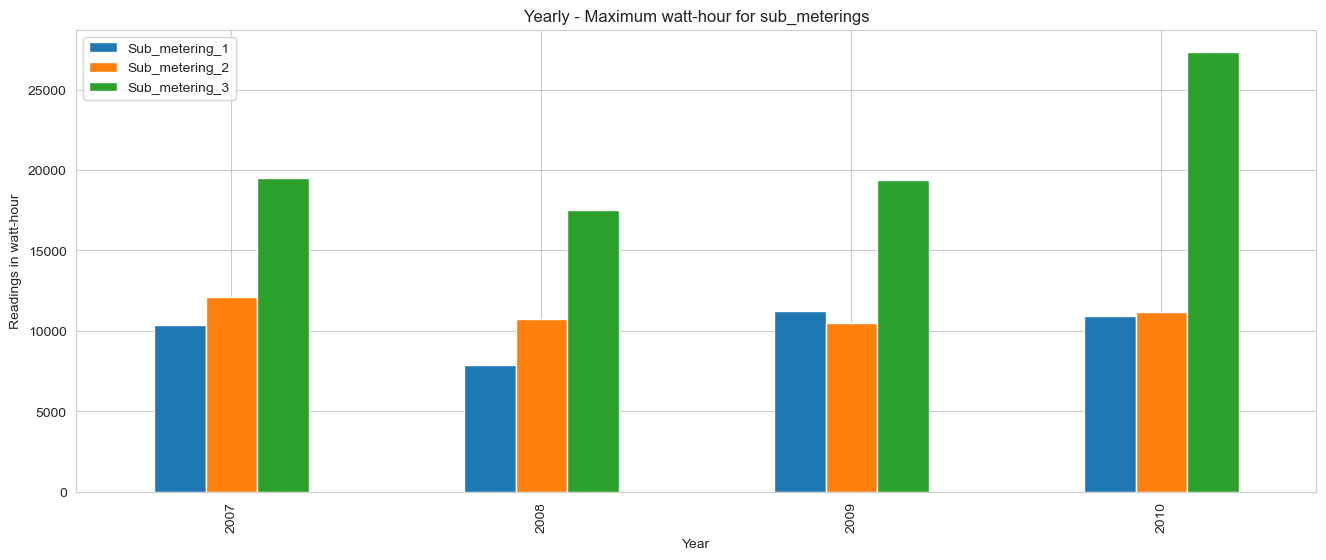

In [58]:
# Yearly - Maximum watt-hour for sub_meterings

df_sub_met.groupby(df_sub_met.index.year).max().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',
                                                          title="Yearly - Maximum watt-hour for sub_meterings",figsize=(16,6))


<AxesSubplot:title={'center':'Yearly - Average watt-hour for sub_meterings'}, xlabel='Year', ylabel='Readings in watt-hour'>

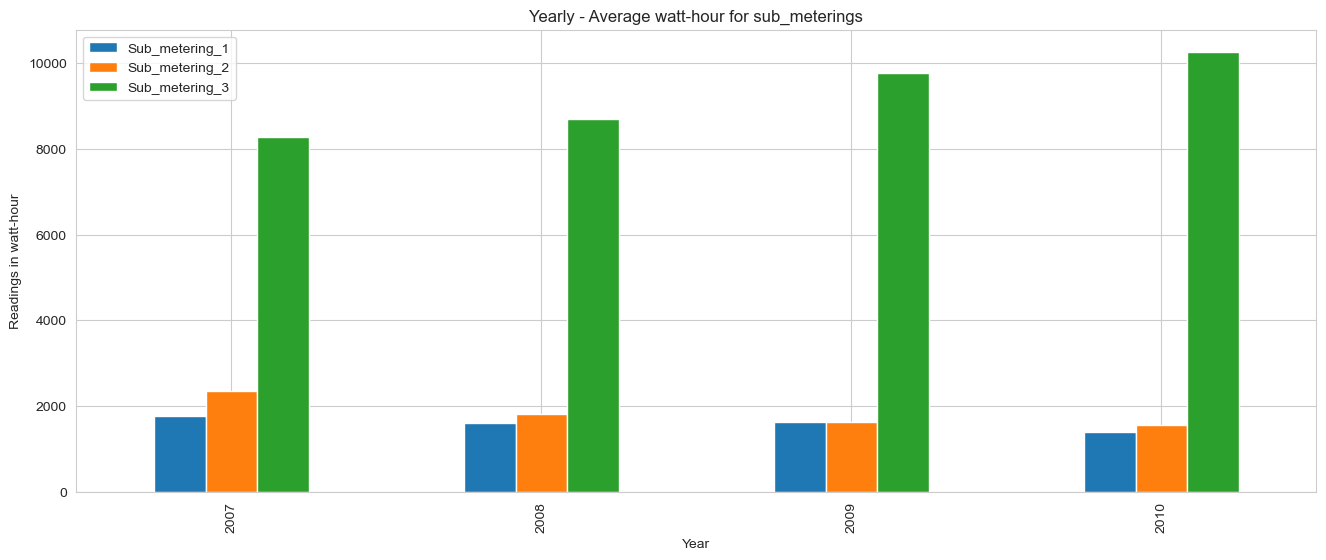

In [59]:
# Yearly - Average watt-hour for sub_meterings

df_sub_met.groupby(df_sub_met.index.year).mean().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',
                                                          title="Yearly - Average watt-hour for sub_meterings",figsize=(16,6))


Observation for Yearly Sub-Meterings: 1,2,3 (in watt hour)
(Ignoring year 2006)

1. Maximum enerygy is taken by submetering 3 in all years followed by submetering 2 and then submetering 3
   consumption of energy is increasing every year by submetering 3 (comprises of AC and water heater)
2. After submetering 3, it is followed by submetering 2 (comprises of laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.), followed by submetering 1 (comprises of kitchen, containing mainly a dishwasher, an oven and a microwave)
3. Reasons could be understood for sub metering 3 might be increasing Global Warming, increased humidity or so, families with more percentage of teenagers, youth or toddlers at home makes submetering 2 to consume energy, for sub-metring 1 not more families might be having kitchen applicances working on electricity.

<AxesSubplot:title={'center':'Monthly - Total watt-hour for sub_meterings'}, xlabel='Month', ylabel='Readings in watt-hour'>

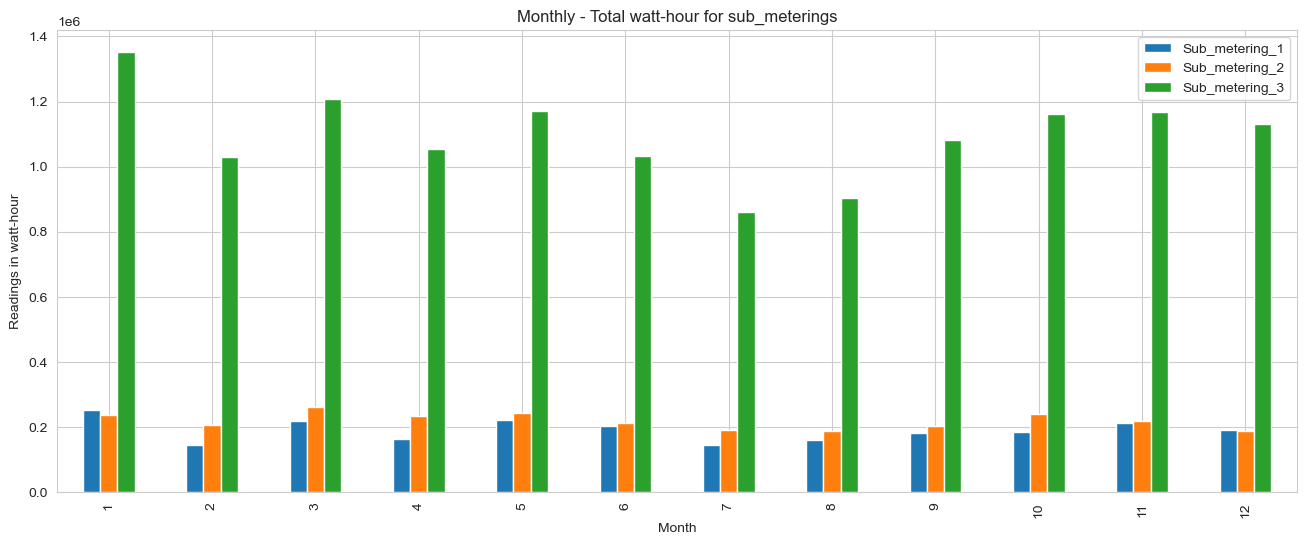

In [60]:
# Monthly - Total watt-hour for sub_meterings

df_sub_met.groupby(df_sub_met.index.month).sum().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',
                                                          title="Monthly - Total watt-hour for sub_meterings",figsize=(16,6))


<AxesSubplot:title={'center':'Monthly - max watt-hour for sub_meterings'}, xlabel='Month', ylabel='Readings in watt-hour'>

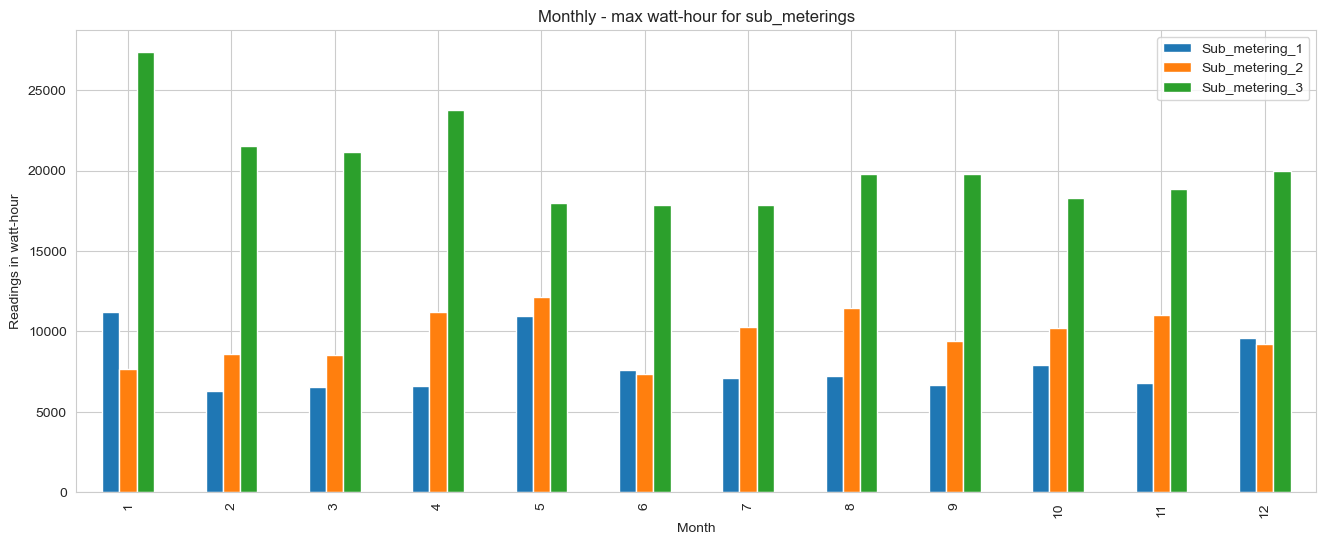

In [61]:
# Monthly - maximum watt-hour for sub_meterings

df_sub_met.groupby(df_sub_met.index.month).max().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',
                                                          title="Monthly - max watt-hour for sub_meterings",figsize=(16,6))


<AxesSubplot:title={'center':'Monthly - Average watt-hour for sub_meterings'}, xlabel='Month', ylabel='Readings in watt-hour'>

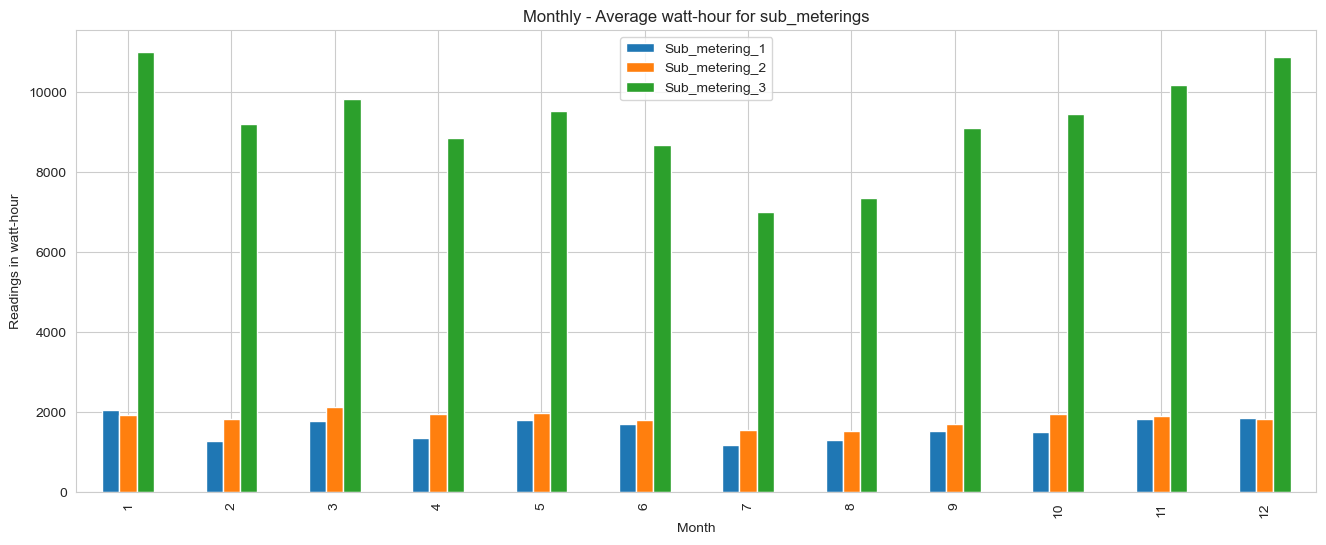

In [62]:
# Monthly - Average watt-hour for sub_meterings

df_sub_met.groupby(df_sub_met.index.month).mean().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',
                                                          title="Monthly - Average watt-hour for sub_meterings",figsize=(16,6))


#### Observation for Monthly Sub-Meterings: 1,2,3 (in watt hour)
1. Consumption of sub-metering 3 enerygy is comparatively low in july and august month
2. sub-metering 1 and 2 consumes almost same amount of energy on average as compared to submetering 3...it increases from around september till january february month

<AxesSubplot:title={'center':'Quarterly - Total watt-hour for sub_meterings'}, xlabel='Quarter', ylabel='Readings in watt-hour'>

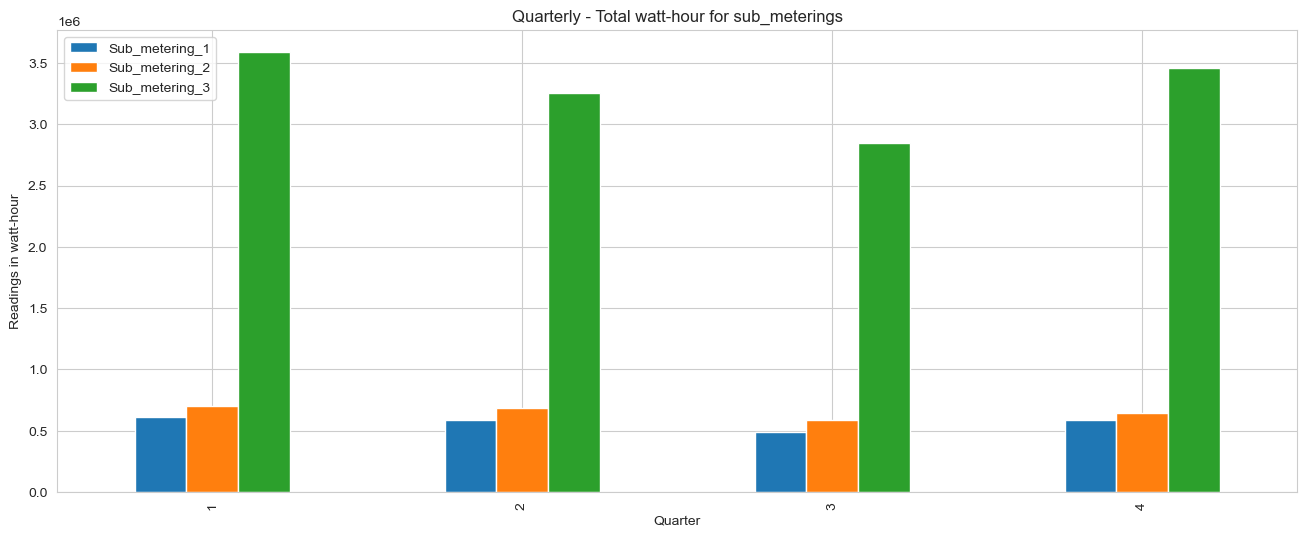

In [63]:
# Quarterly - Total watt-hour for sub-meterings

df_sub_met.groupby(df_sub_met.index.quarter).sum().plot(kind="bar",xlabel='Quarter',ylabel='Readings in watt-hour',
                                                          title="Quarterly - Total watt-hour for sub_meterings",figsize=(16,6))


<AxesSubplot:title={'center':'Quarterly - max watt-hour for sub_meterings'}, xlabel='Quarter', ylabel='Readings in watt-hour'>

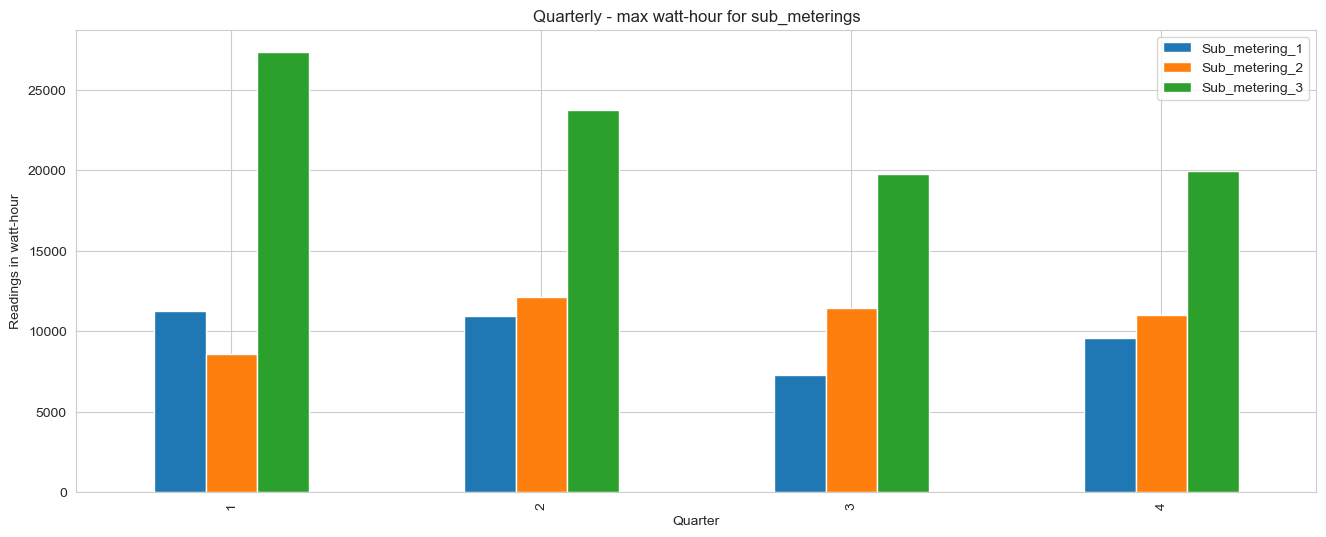

In [64]:
# Quarterly - max watt-hour for sub-meterings

df_sub_met.groupby(df_sub_met.index.quarter).max().plot(kind="bar",xlabel='Quarter',ylabel='Readings in watt-hour',
                                                          title="Quarterly - max watt-hour for sub_meterings",figsize=(16,6))


<AxesSubplot:title={'center':'Quarterly - Average watt-hour for sub_meterings'}, xlabel='Quarter', ylabel='Readings in watt-hour'>

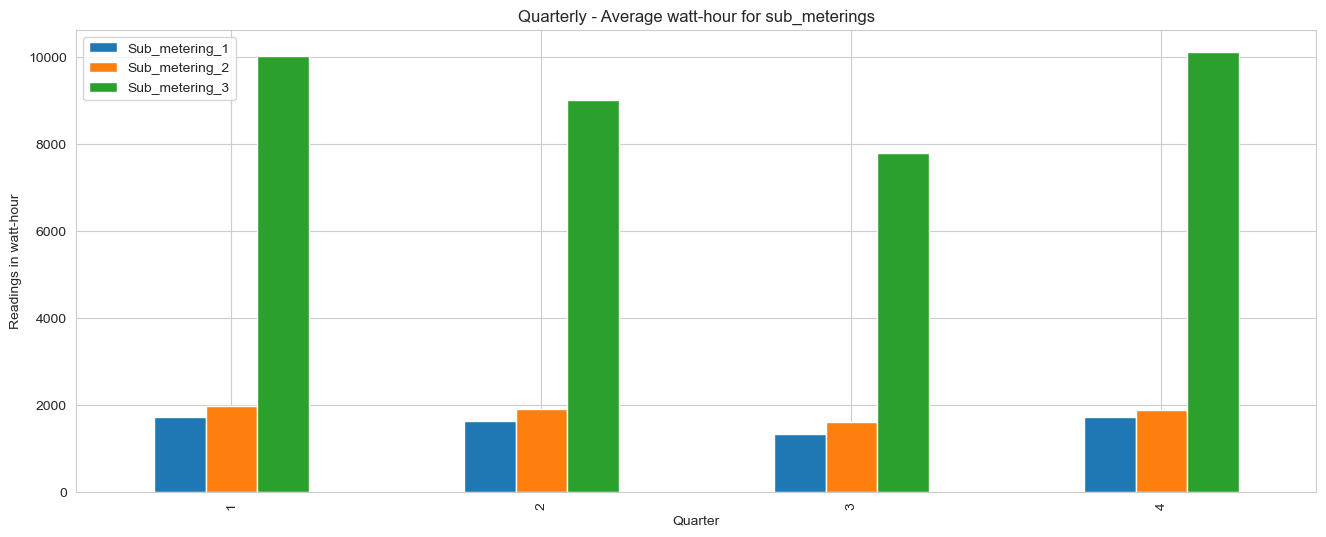

In [65]:
# Quarterly - Average watt-hour for sub-meterings

df_sub_met.groupby(df_sub_met.index.quarter).mean().plot(kind="bar",xlabel='Quarter',ylabel='Readings in watt-hour',
                                                          title="Quarterly - Average watt-hour for sub_meterings",figsize=(16,6))


#### Observation for Quarterly Sub-Meterings: 1,2,3 (in watt hour)

1. Consumption of submetering 1 and 2 is almost same in Second Quarter, whereas submetering 3 consumes less energy in 2nd and 3rd quarter as compared to 1st and 4th quarter.
2. Average consumption of submetering 1,2 and 3 is almost same in quarter 1st and 4th quarter.

<AxesSubplot:title={'center':'Weekly - Total watt-hour for sub_meterings'}, xlabel='week', ylabel='Readings in watt-hour'>

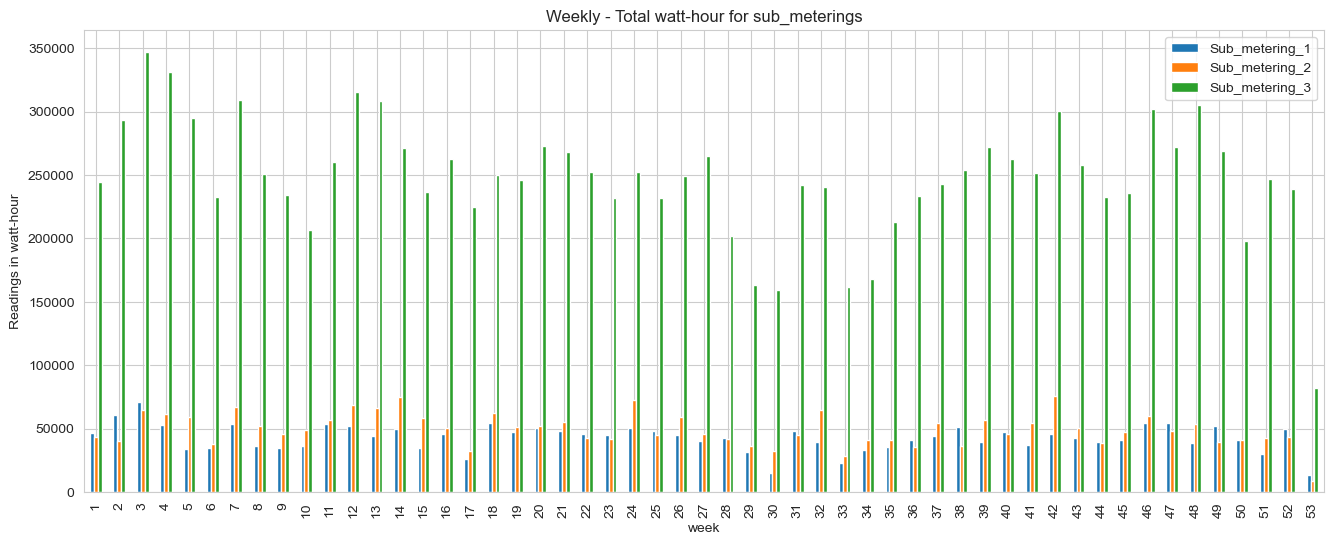

In [66]:
# Weekly - Total watt-hour for sub-meterings

df_sub_met.groupby(df_sub_met.index.week).sum().plot(kind="bar",xlabel='week',ylabel='Readings in watt-hour',
                                                          title="Weekly - Total watt-hour for sub_meterings",figsize=(16,6))


<AxesSubplot:title={'center':'Weekly - max watt-hour for sub_meterings'}, xlabel='week', ylabel='Readings in watt-hour'>

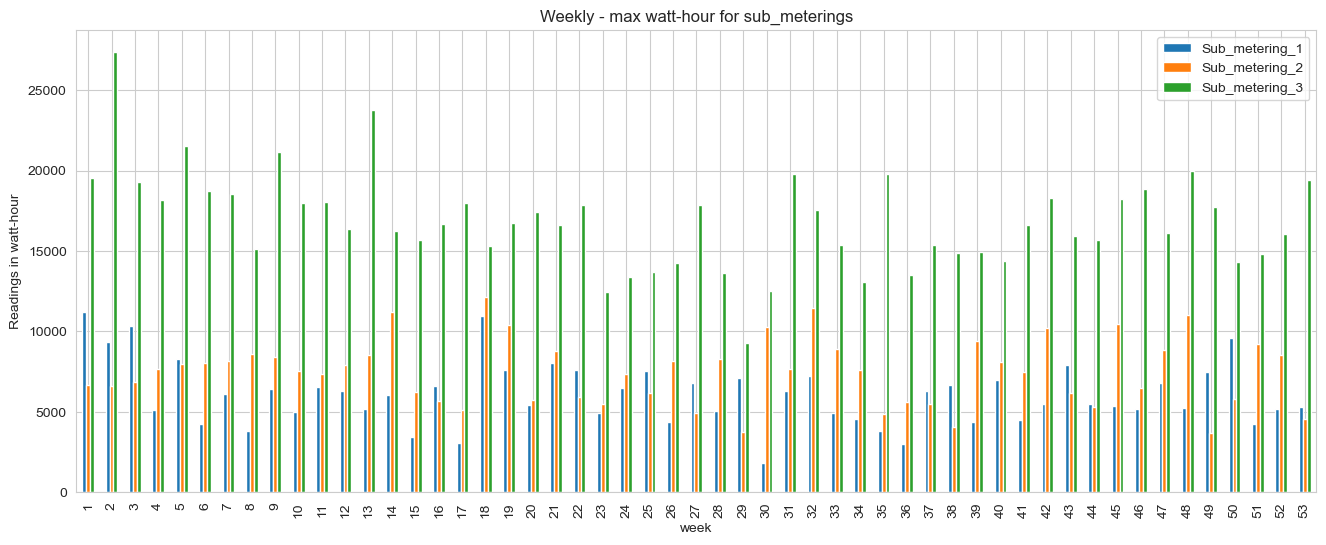

In [67]:
# Weekly - Maximum watt-hour for sub-meterings

df_sub_met.groupby(df_sub_met.index.week).max().plot(kind="bar",xlabel='week',ylabel='Readings in watt-hour',
                                                          title="Weekly - max watt-hour for sub_meterings",figsize=(16,6))


<AxesSubplot:title={'center':'Weekly - Average watt-hour for sub_meterings'}, xlabel='week', ylabel='Readings in watt-hour'>

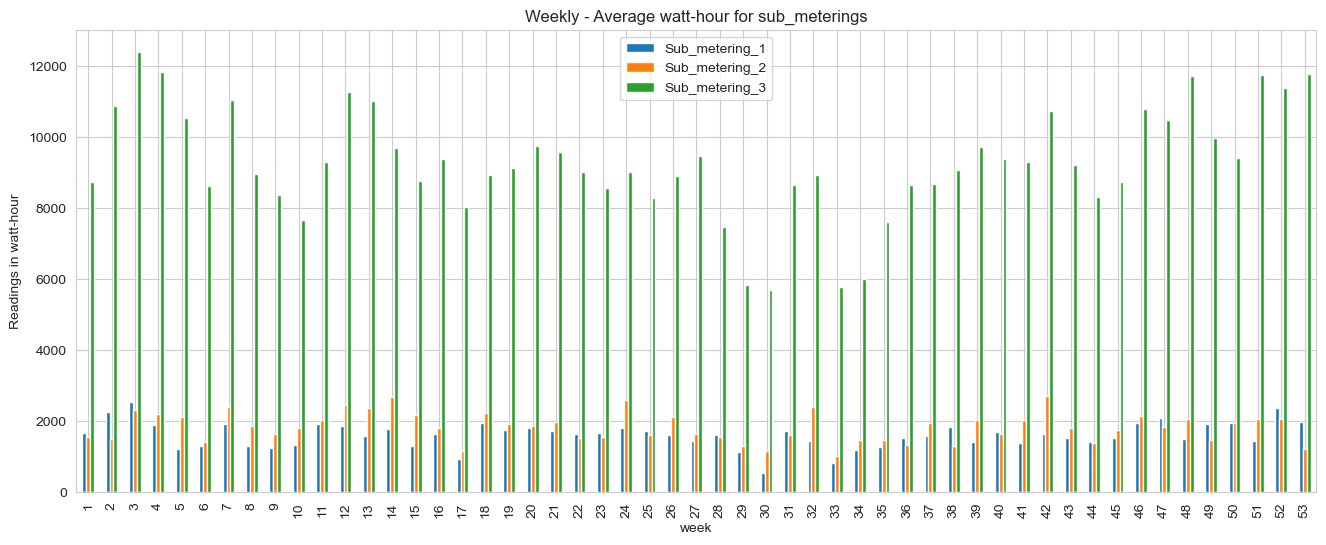

In [68]:
# Weekly - Average watt-hour for sub-meterings

df_sub_met.groupby(df_sub_met.index.week).mean().plot(kind="bar",xlabel='week',ylabel='Readings in watt-hour',
                                                          title="Weekly - Average watt-hour for sub_meterings",figsize=(16,6))


#### Observation for Weekly Sub-Meterings: 1,2,3 (in watt hour)
1. Consumption of energy for all submetering on average remains high im almost all weeks except weeks betwwen 28th to 33rd